In [1]:
import pandas as pd 

FILE = '../Data/all_combined.csv'
df = pd.DataFrame.from_csv(FILE)

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [122]:
df = df_temp

In [123]:
df.content = df.content.str.replace('/',' ') 
df.content = df.content.str.replace(',',' ') 
df.content = df.content.str.replace('(',' ')
df.content = df.content.str.replace(')',' ') 
df.content = df.content.str.replace('"','\'') 

In [124]:
df = df[['category_no_duplicate_str','content']]
df = df.rename(columns={'category_no_duplicate_str':'category'})

In [125]:
df.category = df.category.str.replace('[','') 
df.category = df.category.str.replace(']','') 
df.category = df.category.str.replace('\'','')
df.category = df.category.str.lower()

In [126]:
df.head()

,category,content
0,auctions,notice of auction on friday march 17 2017 a...
1,license suspension,public notice on october 28 2015 the pa sta...
6,elections,february 24 legals notice of special elec...
17,auctions,sheriff's sales bank of america na vs. katedra...
20,auctions,sheriff's sales gulf coast bank and trust co v...


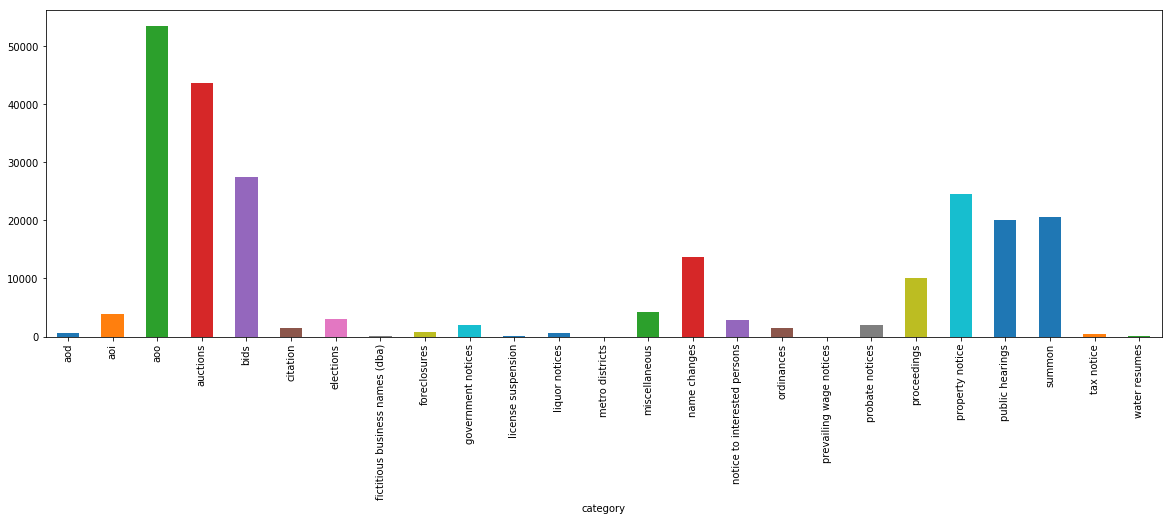

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
df.groupby('category')['content'].count().plot.bar(ylim=0)
plt.show()

In [128]:
print(len(df))
df = df[df.category=='bids']
print(len(df))

237046
27460


In [129]:
import re

sentence = "ab alksa alksj kal"
word = 'ab'

for match in re.finditer(word, sentence):
    print (match.start(), match.end())

0 2


In [142]:
vin = []
def detect_vin(sentence):
    word = 'vin:'
    
    for match in re.finditer(word, sentence):
        sentence = sentence.replace(':', ' ')
        res = sentence[match.start(): match.start()+80].split()[:2]
        print(sentence)
        if 'ign' in res[1]:
            print(sentence)
        if len(res[1])==17:
            vin.append(res[1])
    return

In [143]:
df.content.apply(detect_vin)
print('done')

the following vehicles are  in possession and stored at  hopper & son's exxon  528  park st.  blytheville  ar.  phone  870-763-8815. the  towing  storage and admin-  istration costs are accruing  as a legal liability of the  owner. hopper & son's  exxon claims a first priority  possessory lien on vehicle  and contents for all such  charges. if not claimed with-  in 10 days  vehicles will be  sold to the highest bidder.  failure to exercise your  right to reclaim the vehicle  and contents within the time  prescribed constitutes a  waiver by the owners and  leinholders of all right  title   and interest in the vehicle.  owner may take posses-  sion at any time during busi-  ness hours after proving  ownership and paying all  charges against the vehicle.    2000 ford windstar  vin  2fmza5347yba01572    2008 toyota camry  vin  4tibe46k78u198098
the following vehicles are  in possession and stored at  hopper & son's exxon  528  park st.  blytheville  ar.  phone  870-763-8815. the  towing  s

In [132]:
len(vin)

178

In [133]:
built = {}
manufacturer = {}
year = {}
plant = {}

for v in vin:
    b = v[0]
    built[b] = built.get(b, 0) + 1
    b = v[:3]
    manufacturer[b] = manufacturer.get(b, 0) + 1
    b = v[9]
    year[b] = year.get(b, 0) + 1

In [134]:
print(len(built))
print(built.keys())

9
dict_keys(['2', '4', '1', '3', 'k', 'j', 'y', '5', 'w'])


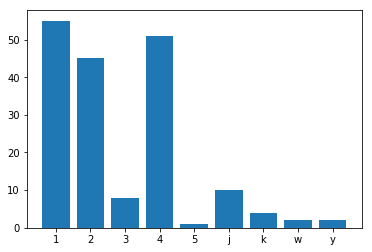

In [135]:
import matplotlib.pylab as plt

lists = sorted(built.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

In [136]:
print(len(manufacturer))
print(manufacturer.keys())

57
dict_keys(['2fm', '4ti', '4en', '1fd', '2fa', '4t1', '3gt', '1gc', 'kmh', '2gc', '1b7', '3d7', '1g8', '1ft', '1hg', '3b7', 'jhm', '1fm', '1gk', '1n4', '1hd', '1fa', '1j4', '1g2', '1gt', '1ln', '4m2', '1g3', '3fa', 'yv1', '3vw', '2hg', '1g6', 'jtd', '2d8', 'jf1', '48b', '2gt', '1g1', 'jn8', 'knd', 'jn1', '1p4', '1nx', 'jt3', '3c4', 'kl1', 'jnk', '5tb', '2c3', '2me', '1d8', '4n2', '1c3', 'jm2', 'wba', '4us'])


In [137]:
print(len(year))
print(year.keys())

23
dict_keys(['y', '8', 'p', '4', 'x', 'v', '7', '5', 'w', '1', 'r', 't', '2', '3', 'k', '6', 'b', '9', 'd', 's', 'm', 'f', 'g'])


In [138]:
for v in vin:
    if v[9]=='#':
        print(v)

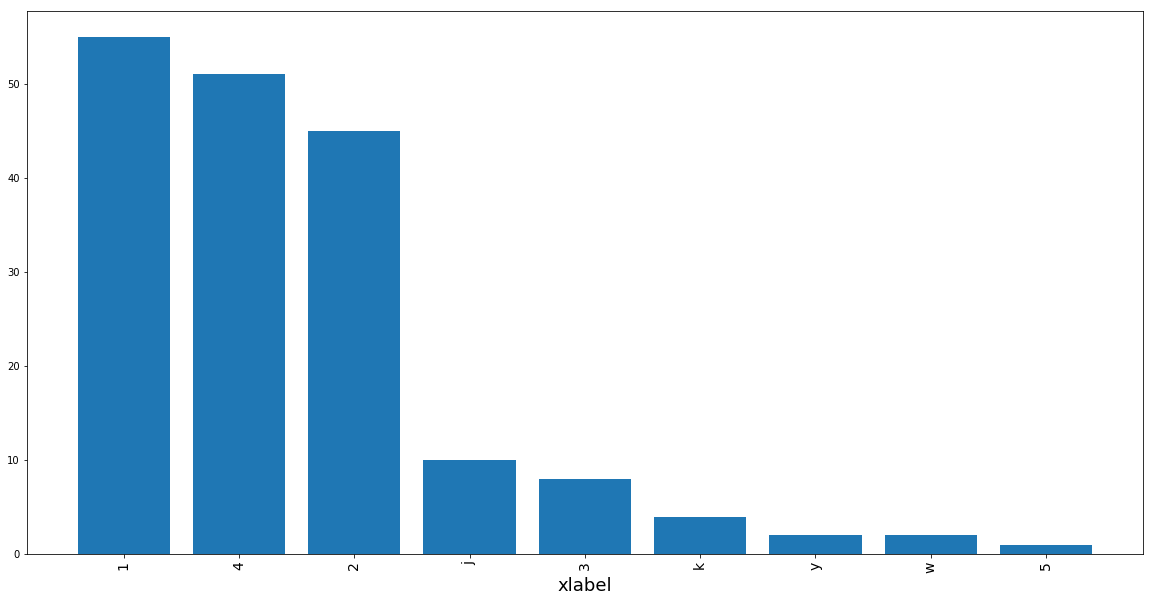

In [139]:
import matplotlib.pylab as plt


lists = sorted(built.items(), key=lambda kv: kv[1], reverse=True)[:20]

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(20,10))
plt.bar(x, y)
plt.xticks(rotation=90, fontsize = 14)
plt.xlabel('xlabel', fontsize=18)
plt.show()

In [ ]:
#dict_keys(['4', '1', '2', 'y', '3', 'j', 'w', 'k', '5', 's', '6', 
#'l', 'z', 'i', 'm', 't', '9', 'v', 'r', 'h', '#', 'n', 'f', 'p'])
YEAR = {'4':'US','1':'US','2':'Canada','y':'Europe','3':'Mexico','j':'Asia','k':'Asia','5':'US','s':'Europe','6':'Australia',
        'l':'Asia','z':'Europe','i':'Asia','m':'Asia','t':'Europe','9':'South America','v':'Europe','r':'Europe','h':'Africa','n':'Europe','f':'Africa','p':'Europe',}